#  LU3MA201 : Projet / Travail d’étude et de recherche

# Représentation graphique des 7 transformations considérées

<div id="ch:method_3"></div>

Bien que la méthode de la **SVD** nous donne une bonne précision de classification, elle classifie mal des chiffres bien écrits mais avec un degré de déviation. Voici un exemple : 


<figure>
    <center><img src="chiffre 6 mal reconnu.png" style="width:25%;max-width:800px;"></center>
    <center><figcaption>Chiffre mal reconnu par la SVD</figcaption></center>
</figure>


Notre troisième algorithme basé sur la **méthode tangente** nous permet de bien classifier ce type de chiffres en prenant en compte la déviation du vecteur image. 

Soit $v \in \mathbb{R}^{784}$ et $s(v,\alpha)$ une transformation de $v$ dans le plan de paramètre $\alpha$. ( $s(v,0)=v$ )

**Définition de distance tangente**

La distance tangente est définie comme la distance minimale entre deux courbes. Dans notre problème, il s'agit de la distance minimale entre deux images $p$ et $e$ qu'on peut approcher par $min_{\alpha_p,\alpha_e}||s(p,\alpha_p)-s(e,\alpha_e)||_2^2$.

Par le **théorème de Taylor**, on a:

$s(v,\alpha) \approx s(v,0)+\frac{ds}{d\alpha}(v,0)\alpha$ 

Donc $s(v,\alpha) \approx v + t_v\alpha$ avec $t_v=\frac{ds}{d\alpha}(v,0)$

Si $\alpha=(\alpha_{i})_i$ alors $s(v,\alpha) \approx v + \Sigma _i \frac{\partial s}{\partial \alpha_{i}}(v,0)\alpha_{i} \approx v + T_v\alpha_v^t$ avec $T_v=(\frac{\partial s}{\partial \alpha_{i}}(v,0))_i$ appelée **matrice tangente**

D'où $min_{\alpha_p,\alpha_e}||s(p,\alpha_p)-s(e,\alpha_e)||_2^2=min_{\alpha_p,\alpha_e}||(p-e)+(T_p\alpha_p^t-T_e\alpha_e^t)||_2^2=min_{\alpha_p,\alpha_e}||(p-e)-(-T_p \; T_e)(\alpha_p^t \; \alpha_e^t)^t)||_2^2$

On pose $A=(-T_p \; T_e)$ , $b=p-e$ et $\lambda=(\alpha_p^t \; \alpha_e^t)^t$

Alors $min_{\alpha_p,\alpha_e}||s(p,\alpha_p)-s(e,\alpha_e)||_2^2=min_{\lambda}||b-A\lambda||_2^2$

Qui est un **problème de moindre carré** ! 

On veut écrire chaque image comme une fonction à deux variables: 

Chaque image $p$ peut s'écrire comme une matrice $P$ de taille 28x28. 

On cherche alors $p$ différentiable telle que $p(i,j)=P_{i,j}$ pour tout $(i,j) \in [1,28]$ .($P_{i,j}$ correspond alors à la valeur d'un pixel)

Cela est vérifié pour la fonction discontinue suivante: $p_*(x,y)=\Sigma_{i,j}P_{i,j}\delta(x-i)\delta(y-j)$

Pour avoir la continuité, on convolutionne $p_*$ avec la fonction gaussienne et on obtient $p(x,y)=\Sigma_{i,j}P_{i,j}g_{\sigma}(x-i,y-j)$. (Nous travaillons avec $\sigma=0.9$ pour notre algorithme)

<div id="ch:method_1"></div>

**Exemples de transformations importantes et leurs dérivées**

* **Translation d'axe (Ox)**: $T_X=\frac{\partial p}{\partial x}=p_x$

* **Translation d'axe (Oy)**: $T_Y=\frac{\partial p}{\partial y}=p_y$

* **Rotation de centre l'origine**: $T_X=y\frac{\partial p}{\partial x}-x\frac{\partial p}{\partial y}=yp_x-xp_y$

* **Scaling**: $T_X=x\frac{\partial p}{\partial x}+y\frac{\partial p}{\partial y}=xp_x+yp_y$

* **Transformation parallèle hyperbolique**: $T_X=x\frac{\partial p}{\partial x}-y\frac{\partial p}{\partial y}=xp_x-yp_y$

* **Transformation diagonale hyperbolique**: $T_X=y\frac{\partial p}{\partial x}+x\frac{\partial p}{\partial y}=yp_x+xp_y$

* **Thickening**: $T_X=(\frac{\partial p}{\partial x})^2+(\frac{\partial p}{\partial y})^2=(p_x)^2+(p_y)^2$

<div id="ch:method_1"></div>

**Les instructions suivantes permettent de charger les données de chiffres manuscrits disponibles dans les fichiers base_apprentissage.mat et base_test.mat :**

In [39]:
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

mat=spi.loadmat("base_apprentissage.mat")
data_train=np.transpose(mat['data'])
label_train=np.array(mat['label'])[0] #label: chiffre numérisé
label_train=label_train.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

mat = spi.loadmat("base_test.mat")
data_test = np.transpose(mat['data'])
label_test = np.array(mat['label'])[0]
label_test =label_test.astype(int)

In [40]:
tuples=[]
for i in range(28):
    for j in range(28):
        tuples+=[(i,j)]
        
tuples_x=np.array([tuples[i][0] for i in range(784)])
tuples_y=np.array([tuples[i][1] for i in range(784)])

<div id="ch:method_1"></div>

**On lisse les images:**

In [41]:
def smooth(v):
    P=np.reshape(v,(28,28))
    def p(x,y):
        S=[P[i,j]*np.e**(-((x-i)**2+(y-j)**2)/(2*0.9**2)) for i,j in tuples]
        return sum(S)
    return p(tuples_x,tuples_y)

In [42]:
smooth_train=[smooth(data_train[i]) for i in range(800)]
smooth_test=[smooth(data_test[i]) for i in range(200)]

In [43]:
smooth_digit=smooth_train[0]
smooth_digit_matrix=np.reshape(smooth_train[0],(28,28))

<div id="ch:method_1"></div>

**On calcule les p_x pour les chiffres:**

In [44]:
def T_X(v):
    P=np.reshape(v,(28,28))
    P_=np.gradient(P)[0]
    return np.reshape(P_,(1,-1))[0]

In [45]:
p_x_train=[T_X(smooth_train[i]) for i in range(800)]
p_x_test=[T_X(smooth_test[i]) for i in range(200)]

<div id="ch:method_1"></div>

**On calcule les p_y pour les chiffres:**

In [46]:
def T_Y(v):
    P=np.reshape(v,(28,28))
    P_=np.gradient(P)[1]
    return np.reshape(P_,(1,-1))[0]

In [47]:
p_y_train=[T_Y(smooth_train[i]) for i in range(800)]
p_y_test=[T_Y(smooth_test[i]) for i in range(200)]

## 3.1 Translation d'axe (Ox) 

**Figures représentant une translation de vecteur $\alpha$ et -$\alpha$ (d'axe (Ox))**

In [11]:
digit=data_train[0] #vecteur du digit choisi
digit_matrix=np.reshape(digit,(28,28)) #matrice du digit choisi

In [15]:
def translation(digit_matrix,x_distance, y_distance):
    h,w=digit_matrix.shape
    Translation_mat=np.array([[1,0,x_distance], [0,1,y_distance]])
    Out_image=np.zeros(digit_matrix.shape)
    for i in range(h):
        for j in range(w):
            origin_x=j
            origin_y=i
            origin_xy=np.array([origin_x,origin_y,1])
            new_xy=np.dot(Translation_mat,origin_xy)
            new_x=new_xy[0]
            new_y=new_xy[1]
            if (0<new_x<w) and (0<new_y<h):
                Out_image[new_y, new_x]=digit_matrix[i,j]
    return Out_image

([], [])

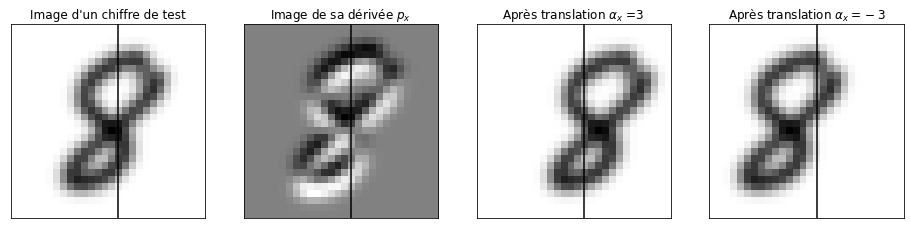

In [17]:
plt.figure(figsize=(16,7))
a=3

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Image de sa dérivée $p_{x}$')
plt.imshow(np.reshape(p_x_train[0],(28,28)), cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title(r'Après translation $\alpha_{x}$ ='+str(a))
plt.imshow(translation(smooth_digit_matrix,a,0), cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Après translation $\alpha_{x}=-$'+str(a))
plt.imshow(translation(smooth_digit_matrix,-a,0), cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

## 3.2 Translation d'axe (Oy) 

**Figures représentant une translation de vecteur $\alpha$ et -$\alpha$ (d'axe (Oy))**

([], [])

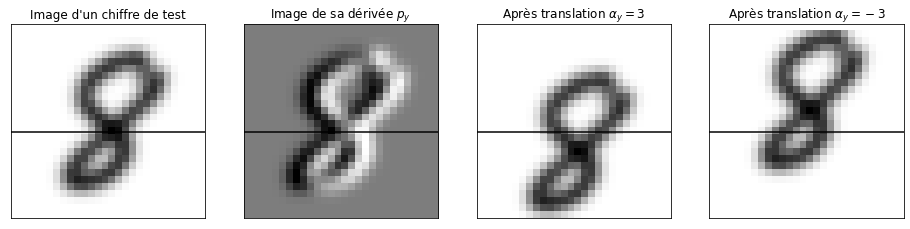

In [19]:
fig=plt.figure(figsize=(16,7))
a=3

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Image de sa dérivée $p_{y}$')
plt.imshow(np.reshape(p_y_train[0],(28,28)), cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])
    
plt.subplot(1,4,3)
plt.title(r'Après translation $\alpha_{y}=$'+str(a))
plt.imshow(translation(smooth_digit_matrix,0,a), cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Après translation $\alpha_{y}=-$'+str(a))
plt.imshow(translation(smooth_digit_matrix,0,-a), cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])

## 3.3 Rotation

In [12]:
p_r_train=tuples_y*np.array(p_x_train)-tuples_x*np.array(p_y_train)
p_r_test=tuples_y*np.array(p_x_test)-tuples_x*np.array(p_y_test)

**Figures représentant une rotation**

In [18]:
# Fonction de rotation d'angle theta

def rotation(digit_matrix,theta):
    h,w=digit_matrix.shape
    Rotation_mat=np.array([[np.cos(theta),np.sin(theta)], [-np.sin(theta),np.cos(theta)]])
    Out_image=np.zeros(digit_matrix.shape)
    for i in range(h):
        for j in range(w):
            origin_x=j
            origin_y=i
            origin_xy=np.array([origin_x,origin_y])
            new_xy=np.dot(Rotation_mat,origin_xy)
            new_x=int(new_xy[0]) # mettre sous forme d'entiers
            new_y=int(new_xy[1]) # mettre sous forme d'entiers
            if (0<new_x<w) and (0<new_y<h):
                Out_image[new_y, new_x]=digit_matrix[i,j]
    return Out_image

([], [])

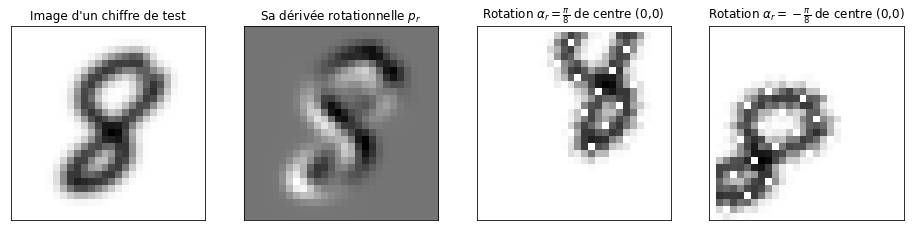

In [24]:
fig=plt.figure(figsize=(16,7))
theta=np.pi/8

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
#plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Sa dérivée rotationnelle $p_{r}$')
plt.imshow(np.reshape(p_r_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title(r'Rotation $\alpha_{r}=\frac{\pi}{8}$ de centre (0,0)')
plt.imshow(rotation(smooth_digit_matrix,theta), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Rotation $\alpha_{r}=-\frac{\pi}{8}$ de centre (0,0)')
plt.imshow(rotation(smooth_digit_matrix,-theta), cmap='gray_r')

plt.xticks([])
plt.yticks([])

## 3.4 Scaling

In [13]:
p_s_train=tuples_x*np.array(p_x_train)+tuples_y*np.array(p_y_train)
p_s_test=tuples_x*np.array(p_x_test)+tuples_y*np.array(p_y_test)

**Figures représentant le scaling**

In [20]:
# Fonction de scaling

def scaling(digit_matrix,S):
    h,w=digit_matrix.shape
    Scaling_mat=(1+S)*np.eye(2)
    Out_image=np.zeros(digit_matrix.shape)
    for i in range(h):
        for j in range(w):
            origin_x=j
            origin_y=i
            origin_xy=np.array([origin_x,origin_y])
            new_xy=np.dot(Scaling_mat,origin_xy)
            new_x=int(new_xy[0])
            new_y=int(new_xy[1])
            if (0<new_x<w) and (0<new_y<h):
                Out_image[new_y, new_x]=digit_matrix[i,j]
    return Out_image

([], [])

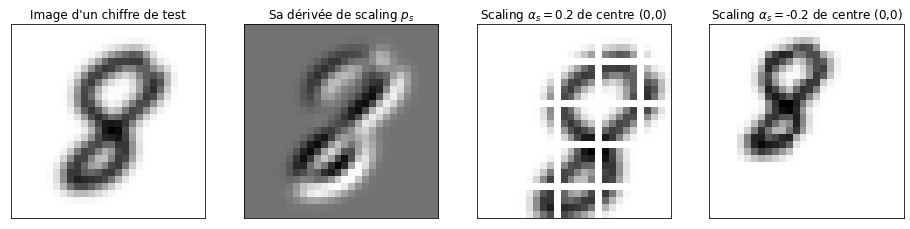

In [27]:
fig=plt.figure(figsize=(16,7))
L1=0.2
L2=-0.2

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Sa dérivée de scaling $p_{s}$')
plt.imshow(np.reshape(p_s_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title(r'Scaling $\alpha_{s}=$'+str(L1)+' de centre (0,0)')
plt.imshow(scaling(smooth_digit_matrix,L1), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Scaling $\alpha_{s}=$'+str(L2)+' de centre (0,0)')
plt.imshow(scaling(smooth_digit_matrix,L2), cmap='gray_r')
plt.xticks([])
plt.yticks([])

## 3.5 Transformation parallèle hyperbolique

In [14]:
p_TPH_train=tuples_x*np.array(p_x_train)-tuples_y*np.array(p_y_train)
p_TPH_test=tuples_x*np.array(p_x_test)-tuples_y*np.array(p_y_test)

**Tentative pour représenter une telle transformation (essai non concluant)**

In [22]:
def TPH_1(alpha):
    return smooth_digit+alpha*p_TPH_train[0]

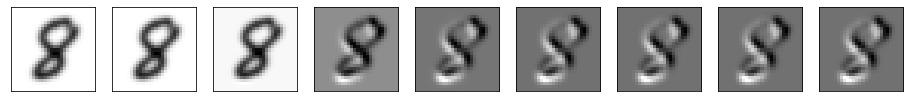

In [27]:
Liste = [1/1000,1/500,1/50,1/5,1,5,10,100,1000]
c=0
plt.figure(figsize=(16,7))
for P in Liste:
    plt.subplot(1,9,c+1)
    plt.imshow(np.reshape(TPH_1(P),(28,28)), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    c=c+1

On ne voit pas de transformation apparente dans les images graphées ci-dessus.

**Images d'une TPH**

In [48]:
def TPH(digit_matrix,P):
    h,w=digit_matrix.shape
    TPH_mat=np.array([[(1+P),0],[0,(1-P)]])
    Out_image=np.zeros(digit_matrix.shape)
    for i in range(h):
        for j in range(w):
            origin_x=j
            origin_y=i
            origin_xy=np.array([origin_x,origin_y])
            new_xy=np.dot(TPH_mat,origin_xy)
            new_x=int(new_xy[0])
            new_y=int(new_xy[1])
            if (0<new_x<w) and (0<new_y<h):
                Out_image[new_y, new_x]=digit_matrix[i,j]
    return Out_image

([], [])

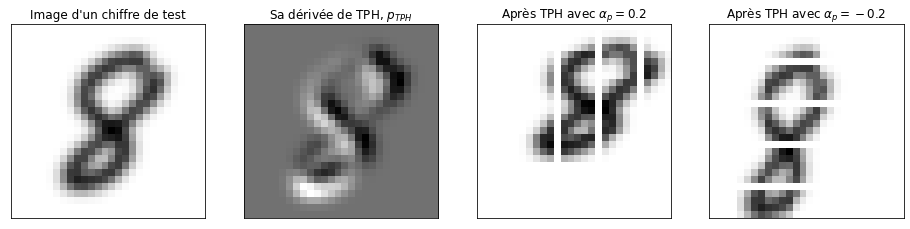

In [49]:
fig=plt.figure(figsize=(16,7))
P=0.2

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Sa dérivée de TPH, $p_{TPH}$')
plt.imshow(np.reshape(p_TPH_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title(r'Après TPH avec $\alpha_{p}=$'+str(P))
plt.imshow(TPH(smooth_digit_matrix,P), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Après TPH avec $\alpha_{p}=-$'+str(P))
plt.imshow(TPH(smooth_digit_matrix,-P), cmap='gray_r')
plt.xticks([])
plt.yticks([])

## 3.6 Transformation diagonale hyperbolique

In [24]:
p_TDH_train=tuples_y*np.array(p_x_train)+tuples_x*np.array(p_y_train)
p_TDH_test=tuples_y*np.array(p_x_test)+tuples_x*np.array(p_y_test)

#### Images d'une TDH 

In [25]:
def TDH(digit_matrix,D):
    h,w=digit_matrix.shape
    TDH_mat=np.array([[1,D],[D,1]])
    Out_image=np.zeros(digit_matrix.shape)
    for i in range(h):
        for j in range(w):
            origin_x=j
            origin_y=i
            origin_xy=np.array([origin_x,origin_y])
            new_xy=np.dot(TDH_mat,origin_xy)
            new_x=int(new_xy[0])
            new_y=int(new_xy[1])
            if (0<new_x<w) and (0<new_y<h):
                Out_image[new_y, new_x]=digit_matrix[i,j]
    return Out_image

([], [])

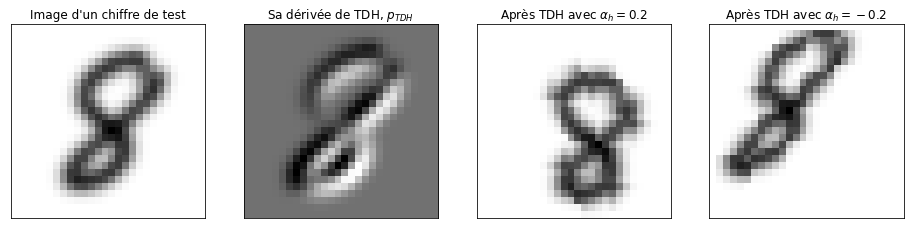

In [38]:
fig=plt.figure(figsize=(16,7))
D=0.2

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Sa dérivée de TDH, $p_{TDH}$')
plt.imshow(np.reshape(p_TDH_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title(r'Après TDH avec $\alpha_{h}=$'+str(D))
plt.imshow(TDH(smooth_digit_matrix,D), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Après TDH avec $\alpha_{h}=-$'+str(D))
plt.imshow(TDH(smooth_digit_matrix,-D), cmap='gray_r')
plt.xticks([])
plt.yticks([])

## 3.7 Thickening

In [26]:
p_T_train=np.array(p_x_train)**2+np.array(p_y_train)**2
p_T_test=np.array(p_x_test)**2+np.array(p_y_test)**2

In [27]:
T=1/500

THICK1=smooth_digit+T*p_T_train[0]
THICK2=smooth_digit-T*p_T_train[0]

**Images de thickening**

([], [])

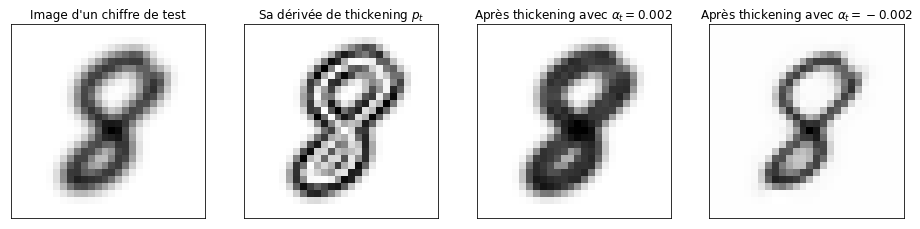

In [51]:
fig=plt.figure(figsize=(16,7))

plt.subplot(1,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.title('Sa dérivée de thickening $p_{t}$')
plt.imshow(np.reshape(p_T_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,3)
plt.title(r'Après thickening avec $\alpha_{t}=$'+str(T))
plt.imshow(np.reshape(THICK1,(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.title(r'Après thickening avec $\alpha_{t}=-$'+str(T))
plt.imshow(np.reshape(THICK2,(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

### Graphique de l'ensemble des transformations

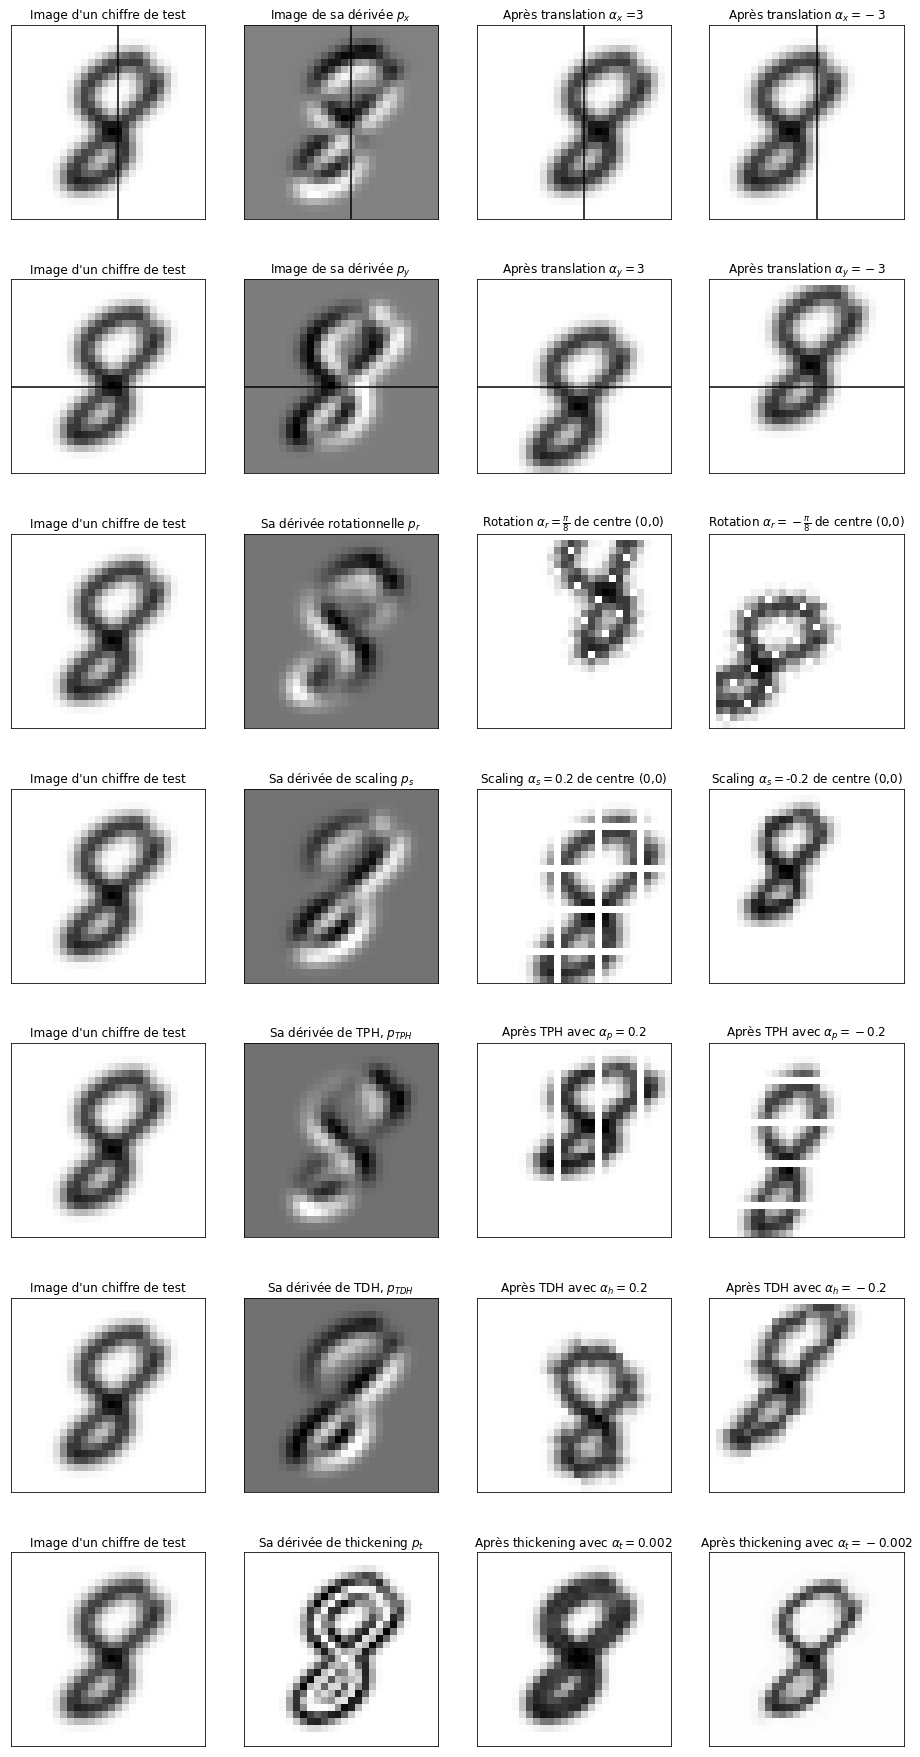

In [30]:
plt.figure(figsize=(16,32))
a=3

#TRANSLATION OX
plt.subplot(7,4,1)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,2)
plt.title('Image de sa dérivée $p_{x}$')
plt.imshow(np.reshape(p_x_train[0],(28,28)), cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,3)
plt.title(r'Après translation $\alpha_{x}$ ='+str(a))
plt.imshow(translation(smooth_digit_matrix,a,0), cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,4)
plt.title(r'Après translation $\alpha_{x}=-$'+str(a))
plt.imshow(translation(smooth_digit_matrix,-a,0), cmap='gray_r')
plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

#TRANSLATION OY
plt.subplot(7,4,5)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,6)
plt.title('Image de sa dérivée $p_{y}$')
plt.imshow(np.reshape(p_y_train[0],(28,28)), cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])
    
plt.subplot(7,4,7)
plt.title(r'Après translation $\alpha_{y}=$'+str(a))
plt.imshow(translation(smooth_digit_matrix,0,a), cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,8)
plt.title(r'Après translation $\alpha_{y}=-$'+str(a))
plt.imshow(translation(smooth_digit_matrix,0,-a), cmap='gray_r')
plt.axhline(y=15, color='black')
plt.xticks([])
plt.yticks([])

#ROTATION
theta=np.pi/8

plt.subplot(7,4,9)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
#plt.axvline(x=15, color='black')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,10)
plt.title('Sa dérivée rotationnelle $p_{r}$')
plt.imshow(np.reshape(p_r_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,11)
plt.title(r'Rotation $\alpha_{r}=\frac{\pi}{8}$ de centre (0,0)')
plt.imshow(rotation(smooth_digit_matrix,theta), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,12)
plt.title(r'Rotation $\alpha_{r}=-\frac{\pi}{8}$ de centre (0,0)')
plt.imshow(rotation(smooth_digit_matrix,-theta), cmap='gray_r')
plt.xticks([])
plt.yticks([])

#SCALING
L1=0.2
L2=-0.2

plt.subplot(7,4,13)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,14)
plt.title('Sa dérivée de scaling $p_{s}$')
plt.imshow(np.reshape(p_s_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,15)
plt.title(r'Scaling $\alpha_{s}=$'+str(L1)+' de centre (0,0)')
plt.imshow(scaling(smooth_digit_matrix,L1), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,16)
plt.title(r'Scaling $\alpha_{s}=$'+str(L2)+' de centre (0,0)')
plt.imshow(scaling(smooth_digit_matrix,L2), cmap='gray_r')
plt.xticks([])
plt.yticks([])

#TPH
P=0.2

plt.subplot(7,4,17)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,18)
plt.title('Sa dérivée de TPH, $p_{TPH}$')
plt.imshow(np.reshape(p_TPH_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,19)
plt.title(r'Après TPH avec $\alpha_{p}=$'+str(P))
plt.imshow(TPH(smooth_digit_matrix,P), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,20)
plt.title(r'Après TPH avec $\alpha_{p}=-$'+str(P))
plt.imshow(TPH(smooth_digit_matrix,-P), cmap='gray_r')
plt.xticks([])
plt.yticks([])

#TDH
D=0.2

plt.subplot(7,4,21)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,22)
plt.title('Sa dérivée de TDH, $p_{TDH}$')
plt.imshow(np.reshape(p_TDH_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,23)
plt.title(r'Après TDH avec $\alpha_{h}=$'+str(D))
plt.imshow(TDH(smooth_digit_matrix,D), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,24)
plt.title(r'Après TDH avec $\alpha_{h}=-$'+str(D))
plt.imshow(TDH(smooth_digit_matrix,-D), cmap='gray_r')
plt.xticks([])
plt.yticks([])

#Thickening

plt.subplot(7,4,25)
plt.title('Image d\'un chiffre de test')
plt.imshow(smooth_digit_matrix, cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,26)
plt.title('Sa dérivée de thickening $p_{t}$')
plt.imshow(np.reshape(p_T_train[0],(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,27)
plt.title(r'Après thickening avec $\alpha_{t}=$'+str(T))
plt.imshow(np.reshape(THICK1,(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.subplot(7,4,28)
plt.title(r'Après thickening avec $\alpha_{t}=-$'+str(T))
plt.imshow(np.reshape(THICK2,(28,28)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.savefig('image_all_transfo.png'.format(i), dpi=300, bbox_inches='tight')